# Being admitted in Marvel's Avengers: A coin flip for life and death?

This notebook is based on the the dataquest challenge for cleaning data: https://www.dataquest.io/mission/114/challenge-cleaning-data/. Code has largely been copy/ pasted to test out functionalities of IPython notebook.

The dataset challenge uses a dataset from FiveThirtyEight.

Related article: http://fivethirtyeight.com/features/avengers-death-comics-age-of-ultron/

Utilized dataset: https://github.com/fivethirtyeight/data/tree/master/avengers

In [2]:
# importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading in the dataset.
# Dataset is not encoded in standard utf-8 but rather iso-8859-1 - also known as latin-1.
# Found information at: http://pandaproject.net/docs/determining-the-encoding-of-a-csv-file.html

avengers = pd.read_csv("avengers.csv", encoding = "iso-8859-1")

In [27]:
#Outputting the first 5 rows and header for exploratory purposes
avengers.head(5)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [26]:
#Outputting all column headers
avengers.columns.values

array(['URL', 'Name/Alias', 'Appearances', 'Current?', 'Gender',
       'Probationary Introl', 'Full/Reserve Avengers Intro', 'Year',
       'Years since joining', 'Honorary', 'Death1', 'Return1', 'Death2',
       'Return2', 'Death3', 'Return3', 'Death4', 'Return4', 'Death5',
       'Return5', 'Notes'], dtype=object)

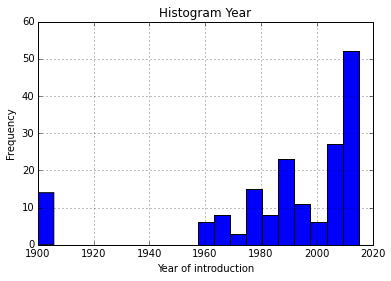

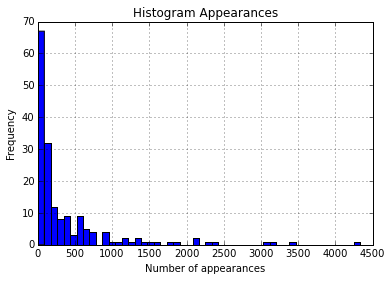

In [40]:
#Outputting histograms for colums "appearences" and "Year" for exploratory purposes

avengers['Year'].hist(bins = 20)
plt.title("Histogram Year")
plt.xlabel("Year of introduction")
plt.ylabel("Frequency")
plt.show()

avengers['Appearances'].hist(bins = 50)
plt.title("Histogram Appearances")
plt.xlabel("Number of appearances")
plt.ylabel("Frequency")
plt.show()

The output suggests, that some data has is not correct. The year of introcution can not be before 1960, the year of the introduction of the comic book series. 

Dataquest opts to discard these rows/ characters (~15). 

It is interisting to see how the number of characters introduced has increased within the last couple of years.

The apparences histrogram shows a a large variance between the number of times a character was featured in the series. It might be interisting to look at how the popularity of a character  

In [38]:
# check how relevant the characters with wrong information in the "year" are by seeing how often the appear overall
wrong_year = pd.DataFrame()
wrong_year = avengers[avengers["Year"] < 1959]

wrong_year.head(15)



,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
75,http://marvel.wikia.com/Elvin_Haliday_(Earth-6...,Elvin Haliday,158,NO,MALE,Feb-91,NaN,1900,115,Probationary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,http://marvel.wikia.com/William_Baker_(Earth-6...,William Baker,355,NO,MALE,Feb-91,NaN,1900,115,Probationary,...,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Died in Identity_Disc_Vol_1_1. Later was revea...
122,http://marvel.wikia.com/James_Santini_(Earth-6...,James Santini,40,YES,MALE,NaN,NaN,1900,115,Academy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,http://marvel.wikia.com/Emery_Schaub_(Earth-616)#,Emery Schaub,26,YES,MALE,NaN,NaN,1900,115,Academy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,http://marvel.wikia.com/Fiona_(Inhuman)_(Earth...,Fiona,2,YES,FEMALE,NaN,NaN,1900,115,Academy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,http://marvel.wikia.com/Hollow_(Earth-616)#,Yvette,22,YES,FEMALE,NaN,NaN,1900,115,Academy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,http://marvel.wikia.com/Julie_Power_(Earth-616)#,Julie Power,153,YES,FEMALE,NaN,NaN,1900,115,Academy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,http://marvel.wikia.com/Alani_Ryan_(Earth-616)#,Alani Ryan,73,YES,FEMALE,NaN,NaN,1900,115,Academy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,http://marvel.wikia.com/Johnathon_Gallo_(Earth...,Johnny Gallo,43,YES,MALE,NaN,NaN,1900,115,Academy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,http://marvel.wikia.com/Lyra_(Earth-8009)#,Lyra,55,YES,FEMALE,NaN,NaN,1900,115,Academy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some characters have triple or double digit appaerences, fixing dataset might make sense. ~10% of sample will be dropped. Proceeding with elimitation anyways.

In [41]:
true_avengers = avengers[avengers["Year"] > 1959]

From dataquest instructions: 

We are interested in the number of total deaths each character experienced and we'd like a field containing that distilled information.

In [44]:
columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
true_avengers[columns]

def count_deaths(row):
        count = 0
        for item in row:
            if item == "YES":
                count += 1
        return count

true_avengers["Deaths"]= true_avengers[columns].apply(count_deaths, axis =1)

//anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
# check if column has been added
true_avengers.head(1)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes,Deaths
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...,1


From dataquest instructions:

For the final task, we want to know if the Years since joining field accurately reflects the Year column. If an Avenger was introduced in Year 1960, is the Years since joined value for that Avenger 55?

In [47]:
joined_accuracy_count  = len(true_avengers[(true_avengers["Years since joining"] + true_avengers["Year"]) == 2015])
inaccurate_count = len(true_avengers) - joined_accuracy_count
print (inaccurate_count)

0
